# 1. Project Overview

# MCP-Powered Multi-Agent Air Quality Reasoning System
## Data Preparation for Multi-Task Health Impact Estimation

This notebook prepares the air quality and health impact dataset for a **Multi-Task Deep Neural Network** that jointly predicts:

- **HealthImpactScore** (continuous: 0–100)
- **HealthImpactClass** (discrete risk category)

The system is part of a **multi-agent reasoning architecture** where:
- Perception agents process environmental and health signals,
- A reasoning agent infers risk severity,
- An explanation agent communicates the impact to humans.

The dataset contains atmospheric pollutants, meteorological variables, and observed health outcomes used to model pollution-related health risk.


# 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE


# 3. Load Dataset

In [2]:
df = pd.read_csv("air_quality_health_impact_data-4.csv")
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


# 4. Dataset Structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [4]:
df.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


# 5. Check Missing Values & Duplicates


In [5]:
df.isnull().sum()

,0
RecordID,0
AQI,0
PM10,0
PM2_5,0
NO2,0
SO2,0
O3,0
Temperature,0
Humidity,0
WindSpeed,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df = df.drop_duplicates()

# 6. Target Columns

In [8]:
score_col = "HealthImpactScore"
class_col = "HealthImpactClass"

# 7. Outlier Detection (Isolation Forest)

In [9]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop([score_col, class_col])

iso = IsolationForest(contamination=0.02, random_state=42)
mask = iso.fit_predict(df[num_cols])

df = df[mask == 1]

# 8. Feature Engineering

In [10]:
df["PM_ratio"] = df["PM2_5"] / (df["PM10"] + 1e-6)
df["NO2_O3_interaction"] = df["NO2"] * df["O3"]
df["HealthLoadIndex"] = (
    df["RespiratoryCases"] +
    df["CardiovascularCases"] +
    df["HospitalAdmissions"]
)


# 9. Feature / Target Split

In [11]:
X = df.drop(columns=[score_col, class_col, "RecordID"])
y_score = df[score_col]
y_class = df[class_col]


# 10. Scaling

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 11. Train-Test Split

In [13]:
X_train, X_test, y_score_train, y_score_test, y_class_train, y_class_test = train_test_split(
    X_scaled, y_score, y_class, test_size=0.2, stratify=y_class, random_state=42
)


# 12. Class Balancing

In [14]:
sm = SMOTE(random_state=42)
y_score_train_np = y_score_train.values.reshape(-1, 1)
X_train_combined = np.hstack((X_train, y_score_train_np))
X_train_combined_bal, y_class_train_bal = sm.fit_resample(X_train_combined, y_class_train)
X_train_bal = X_train_combined_bal[:, :-1]
y_score_train_bal = pd.Series(X_train_combined_bal[:, -1], name=score_col)
y_class_train_bal = pd.Series(y_class_train_bal, name=class_col)

# 13. Class Distribution

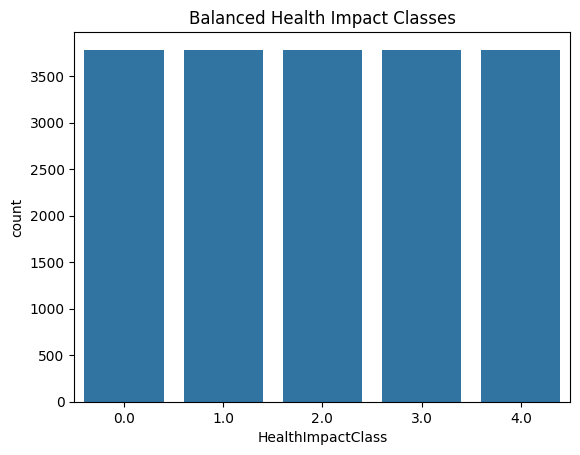

In [15]:
sns.countplot(x=y_class_train_bal)
plt.title("Balanced Health Impact Classes")
plt.show()


# 14. Correlation Insights

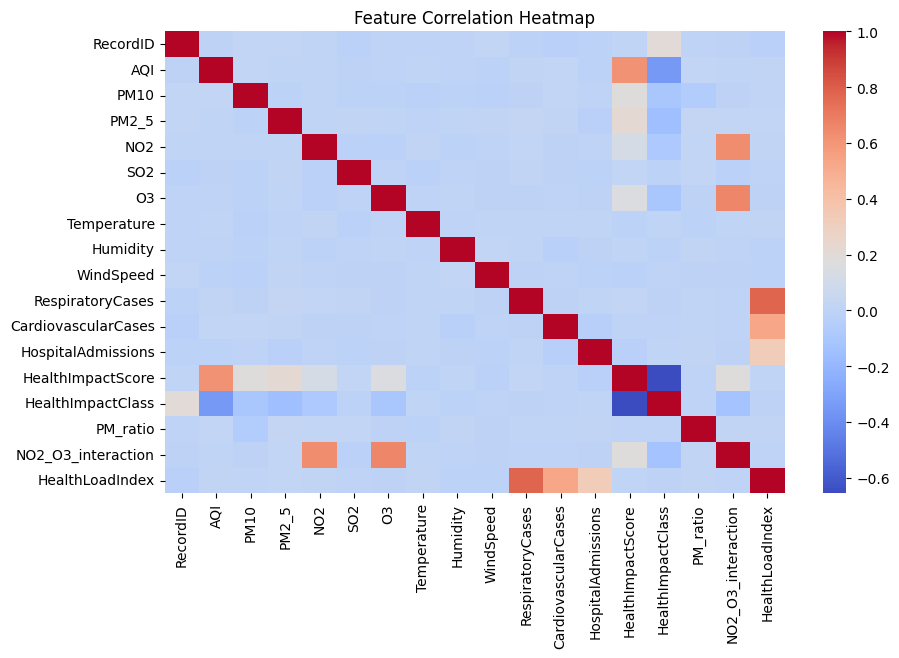

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# Distribution of HealthImpactScore
The score is right-skewed with a concentration near higher values, indicating that most recorded conditions correspond to moderate to high health risk scenarios.


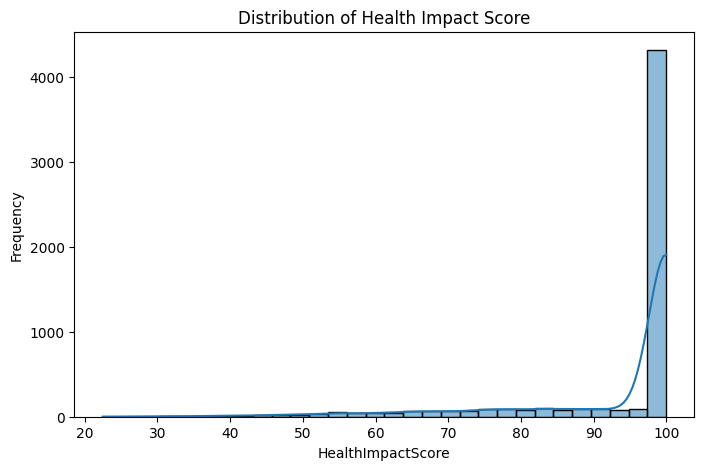

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df["HealthImpactScore"], bins=30, kde=True)
plt.title("Distribution of Health Impact Score")
plt.xlabel("HealthImpactScore")
plt.ylabel("Frequency")
plt.show()


# HealthImpactClass Distribution (Before Balancing)
The dataset is imbalanced across risk categories, with lower risk classes being more frequent. This motivates resampling or weighted learning strategies.


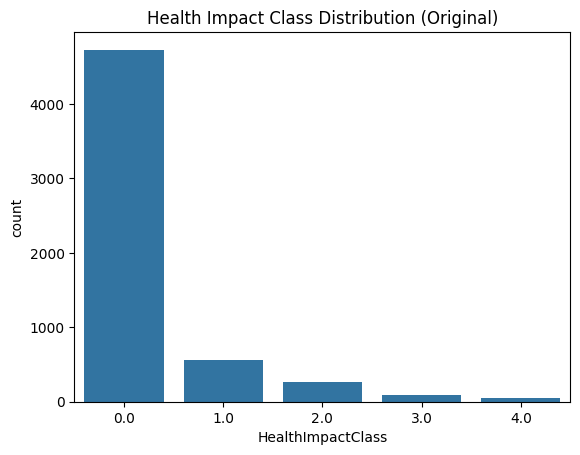

In [18]:
sns.countplot(x=df["HealthImpactClass"])
plt.title("Health Impact Class Distribution (Original)")
plt.show()


# Scatter: PM2.5 vs HealthImpactScore
PM2.5 exhibits a strong positive association with health impact, reflecting the role of fine particulates in respiratory and cardiovascular risk.


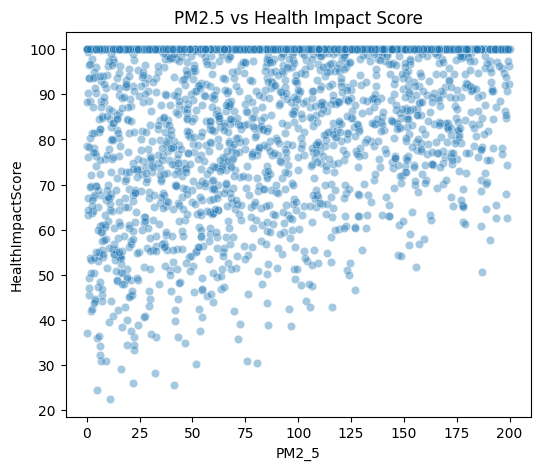

In [19]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df["PM2_5"], y=df["HealthImpactScore"], alpha=0.4)
plt.title("PM2.5 vs Health Impact Score")
plt.show()


# Boxplot: HealthImpactScore by Class
HealthImpactScore increases monotonically with HealthImpactClass, validating class labels as meaningful discretizations of the continuous risk scale.


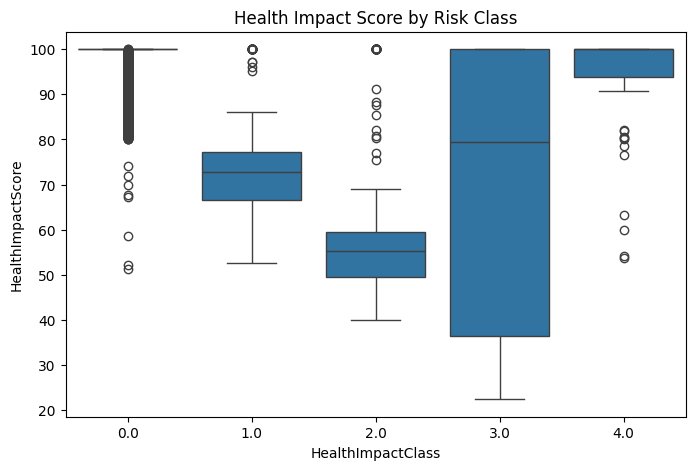

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["HealthImpactClass"], y=df["HealthImpactScore"])
plt.title("Health Impact Score by Risk Class")
plt.show()
